# Poincaré Maps

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Apply PathSim docs matplotlib style for consistent, theme-friendly figures
plt.style.use('../pathsim_docs.mplstyle')

from pathsim import Simulation, Connection
from pathsim.blocks import Scope, ODE
from pathsim.solvers import RKCK54
from pathsim.events import ZeroCrossing

In [17]:
# parameters 
sigma, rho, beta = 10, 28, 8/3

# Initial conditions
xyz_0 = np.array([1.0, 1.0, 1.0])

def f_lorenz(_x, _u, t):
    x, y, z = _x
    return np.array([sigma*(y-x), x*(rho-z)-y, x*y-beta*z])

lrz = ODE(func=f_lorenz, initial_value=xyz_0)
sco = Scope(labels=["x", "y", "z"])

blocks = [lrz, sco]

connections = [
    Connection(lrz[:3], sco[:3])
    ]

In [19]:
pcm_xz = {"x":[], "z":[]}

def fnc_xz_evt(t):
    *_, [x, y, z] = lrz()
    return y

def fnc_xz_act(t):
    *_, [x, y, z] = lrz()
    pcm_xz["x"].append(x)
    pcm_xz["z"].append(z)

E_xz = ZeroCrossing(
    func_evt=fnc_xz_evt,
    func_act=fnc_xz_act
    )

In [21]:
pcm_yz = {"y":[], "z":[]}

def fnc_yz_evt(t):
    *_, [x, y, z] = lrz()
    return x

def fnc_yz_act(t):
    *_, [x, y, z] = lrz()
    pcm_yz["y"].append(y)
    pcm_yz["z"].append(z)

E_yz = ZeroCrossing(
    func_evt=fnc_yz_evt,
    func_act=fnc_yz_act
    )

In [23]:
pcm_xy = {"x":[], "y":[]}

def fnc_xy_evt(t):
    *_, [x, y, z] = lrz()
    return z - 30

def fnc_xy_act(t):
    *_, [x, y, z] = lrz()
    pcm_xy["x"].append(x)
    pcm_xy["y"].append(y)

E_xy = ZeroCrossing(
    func_evt=fnc_xy_evt,
    func_act=fnc_xy_act
    )

In [25]:
events = [E_xz, E_yz, E_xy]

In [27]:
Sim = Simulation(
    blocks,
    connections,
    events,
    Solver=RKCK54,
    tolerance_lte_rel=1e-6,
    tolerance_lte_abs=1e-8,
    )

2025-10-15 13:29:07,526 - INFO - LOGGING (log: True)
2025-10-15 13:29:07,527 - INFO - BLOCK (type: ODE, dynamic: True, events: 0)
2025-10-15 13:29:07,527 - INFO - BLOCK (type: Scope, dynamic: False, events: 0)
2025-10-15 13:29:07,527 - INFO - GRAPH (size: 2, alg. depth: 1, loop depth: 0, runtime: 0.050ms)


In [29]:
#run the simulation
Sim.run(100)

2025-10-15 13:29:09,702 - INFO - STARTING -> TRANSIENT (Duration: 100.00s)
2025-10-15 13:29:09,702 - INFO - TRANSIENT:   0% | elapsed: 00:00:00 (eta: --:--:--) | 0 steps (N/A steps/s)
2025-10-15 13:29:09,822 - INFO - TRANSIENT:  20% | elapsed: 00:00:00 (eta: 00:00:00) | 1213 steps (10147.5 steps/s)
2025-10-15 13:29:09,940 - INFO - TRANSIENT:  40% | elapsed: 00:00:00 (eta: 00:00:00) | 2504 steps (10899.2 steps/s)
2025-10-15 13:29:10,066 - INFO - TRANSIENT:  60% | elapsed: 00:00:00 (eta: 00:00:00) | 3908 steps (11232.7 steps/s)
2025-10-15 13:29:10,181 - INFO - TRANSIENT:  80% | elapsed: 00:00:00 (eta: 00:00:00) | 5216 steps (11298.3 steps/s)
2025-10-15 13:29:10,313 - INFO - TRANSIENT: 100% | elapsed: 00:00:00 (eta: 00:00:00) | 6711 steps (11353.8 steps/s)
2025-10-15 13:29:10,313 - INFO - TRANSIENT: 100% | elapsed: 00:00:00 (eta: 00:00:00) | 6711 steps (10975.3 avg steps/s)
2025-10-15 13:29:10,313 - INFO - FINISHED -> TRANSIENT (total steps: 6711, successful: 4932, runtime: 611.46 ms)


{'total_steps': 6711,
 'successful_steps': 4932,
 'runtime_ms': 611.4621000015177}

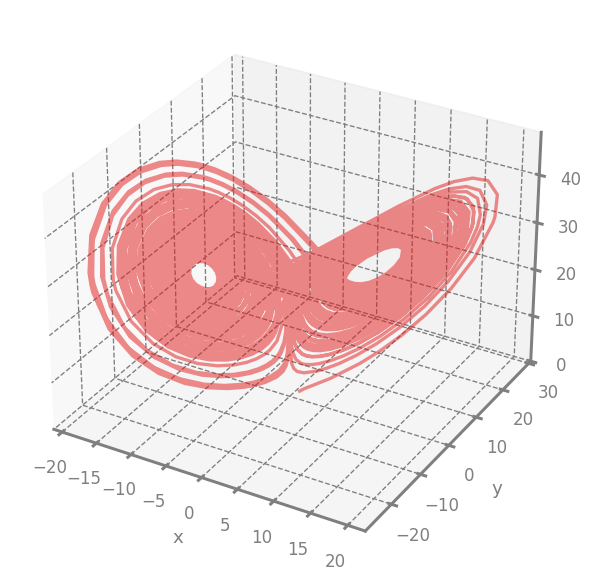

(<Figure size 720x720 with 1 Axes>,
 <Axes3D: xlabel='x', ylabel='y', zlabel='z'>)

In [45]:
sco.plot3D(alpha=0.5)

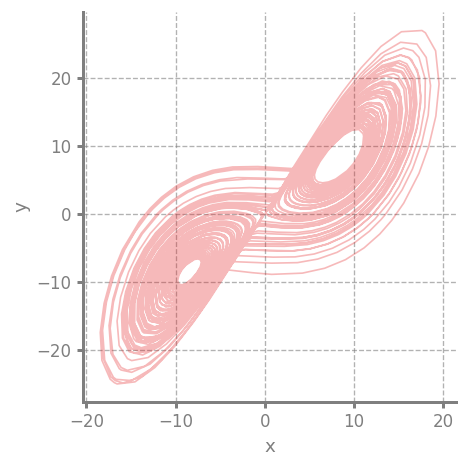

In [33]:
fig, ax = sco.plot2D(axes=(0, 1), alpha=0.3, lw=1)
ax.plot(pcm_xy["x"], pcm_xy["y"], ".", c="k")

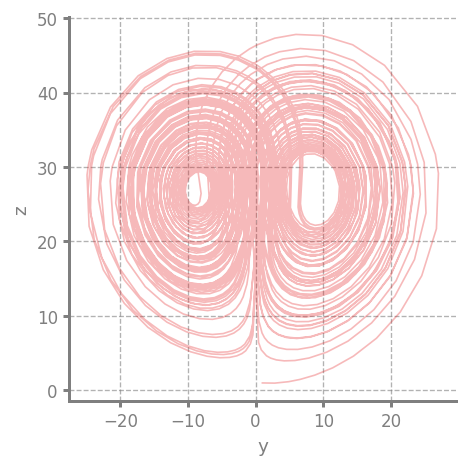

In [35]:
fig, ax = sco.plot2D(axes=(1, 2), alpha=0.3, lw=1)
ax.plot(pcm_yz["y"], pcm_yz["z"], ".", c="k")

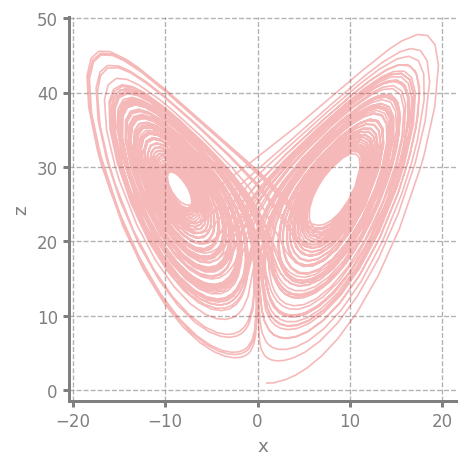

In [41]:
fig, ax = sco.plot2D(axes=(0, 2), alpha=0.3, lw=1)
ax.plot(pcm_xz["x"], pcm_xz["z"], ".", c="k")